In [30]:
import numpy as np
import pandas as pd
import matplotlib as plt
import yfinance as yf
import keras 
import os
import tensorflow as tf
import datetime 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras import optimizers
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [21]:
ticker = 'AAPL'
daysago = 10

ticker = yf.Ticker(ticker.upper())
df = ticker.history(period='max')
df = df[['Close']]
    

for i in range(daysago,-1,-1):
    df['{}daysago'.format(i)] = df['Close'].shift(i)
    df = df.copy()


bruh = pd.DataFrame()
# bruh['-1daysago'.format(i)] = df['Close'].shift(-1)
bruh['pct'] = df['{}daysago'.format(daysago)].pct_change().shift(-1) * 100

df = df.drop(['Close'], axis=1)


df,bruh = df.dropna(),bruh.dropna()
df = df.drop(df.head(1).index)
sc = MinMaxScaler(feature_range=(0,1))
sc2 = MinMaxScaler(feature_range=(0,1))


X,Y = sc.fit_transform(df), sc.fit_transform(bruh)


split = int(len(X)*0.99)
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
X_train, X_test, Y_train, Y_test = X_train.reshape((-1,daysago+1,1)), X_test.reshape((-1,daysago+1,1)), Y_train.reshape((-1,1)), Y_test.reshape((-1,1))
X.shape,Y.shape   

((10983, 11), (10983, 1))

In [22]:
def DataPrep(ticker='aapl',daysago=10):
    ticker = yf.Ticker(ticker.upper())
    df = ticker.history(period='max')
    df = df[['Close']]
        

    for i in range(daysago,-1-1,-1):
        df['{}daysago'.format(i)] = df['Close'].pct_change(1).shift(i)
        df = df.copy()


    bruh = pd.DataFrame()
    # bruh['-1daysago'.format(i)] = df['Close'].shift(-1)
    # bruh['pct'] = df['{}daysago'.format(daysago)].pct_change().shift(-1) * 100

    df = df.drop(['Close'], axis=1)


    df,bruh = df.dropna(),bruh.dropna()
    # df = df.drop(df.head(1).index)
    sc = MinMaxScaler(feature_range=(0,1))
    sc2 = MinMaxScaler(feature_range=(0,1))


    scaled = sc.fit_transform(df)#, sc.fit_transform(bruh)
    X,Y = scaled[:,:daysago+1], scaled[:,daysago+1:]

    split = int(len(X)*0.99)
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    X_train, X_test, Y_train, Y_test = X_train.reshape((-1,daysago+1,1)), X_test.reshape((-1,daysago+1,1)), Y_train.reshape((-1,1)), Y_test.reshape((-1,1))

    return X_train, X_test, Y_train, Y_test,



In [23]:
sp500list = pd.read_csv("../4th attempt total/SP500.csv")
ListOfTickers = []
for i in sp500list['Symbol']:
    ListOfTickers.append(i)

ListOfTickers.remove('BRK.B')
ListOfTickers.remove('BF.B')
ListOfTickers.remove('GEV')
ListOfTickers.remove('SOLV')
ListOfTickers.remove('HUBB')


In [38]:
import keras.backend as K

sp500 = DataPrep('^gspc',10)
sp500_X_test, sp500_Y_test = sp500[1], sp500[3]

model2 = Sequential()
model2.add(InputLayer((11, 1)))
model2.add(LSTM(11))
model2.add(Dense(11, 'sigmoid'))
model2.add(Dense(1, 'linear'))


#no more training 5th, skidaddle from here
cp1 = ModelCheckpoint('../model/5th.keras', save_best_only=False)

model2.compile(loss='mae', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

for ticker in ListOfTickers:
    Data = DataPrep(ticker,10)
    X_train, Y_train = Data[0], Data[2]
    sp500_X_test = np.concatenate((sp500_X_test,Data[1]))
    sp500_Y_test = np.concatenate((sp500_Y_test,Data[3]))
    
    print(ticker)
    model2.fit(X_train, Y_train, epochs=2, batch_size=128, callbacks=[cp1])

# model2.fit(X_train, Y_train, epochs=10, batch_size=128, callbacks=[cp1])

MMM
Epoch 1/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2410 - root_mean_squared_error: 0.2885 
Epoch 2/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0301 - root_mean_squared_error: 0.0427
AOS
Epoch 1/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0814 - root_mean_squared_error: 0.1011
Epoch 2/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 - root_mean_squared_error: 0.0527
ABT
Epoch 1/2
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0836 - root_mean_squared_error: 0.1042
Epoch 2/2
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0406 - root_mean_squared_error: 0.0560
ABBV
Epoch 1/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0393 - root_mean_squared_error: 0.0553 
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0383 - root_mean_squared_error: 0.0547 
ACN
Epoch 1/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0592 - root_mean_squared_error: 0.0773
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0422 - root_mean_squared_error:

In [39]:
model2 = load_model('../model/5th.keras')
y_pred = model2.predict(sp500_X_test)
# y_pred = y_pred.reshape(-1,2,1)
avg_error = (np.sum(np.sqrt((sp500_Y_test - y_pred)**2)))/len(sp500_Y_test)*100

print(avg_error)
avg_error = (np.sum(sp500_Y_test - y_pred))/len(sp500_Y_test)*100
print(avg_error)

1343/1343 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step
6.582360542802861
-3.1724019560611683


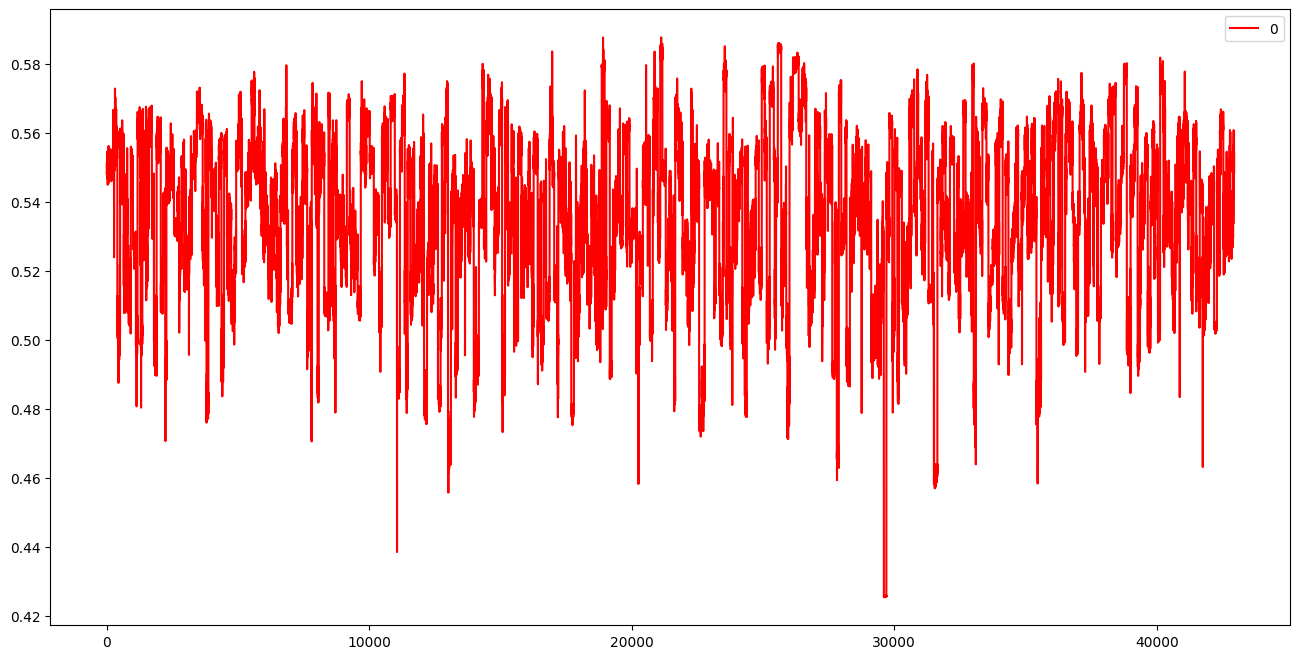

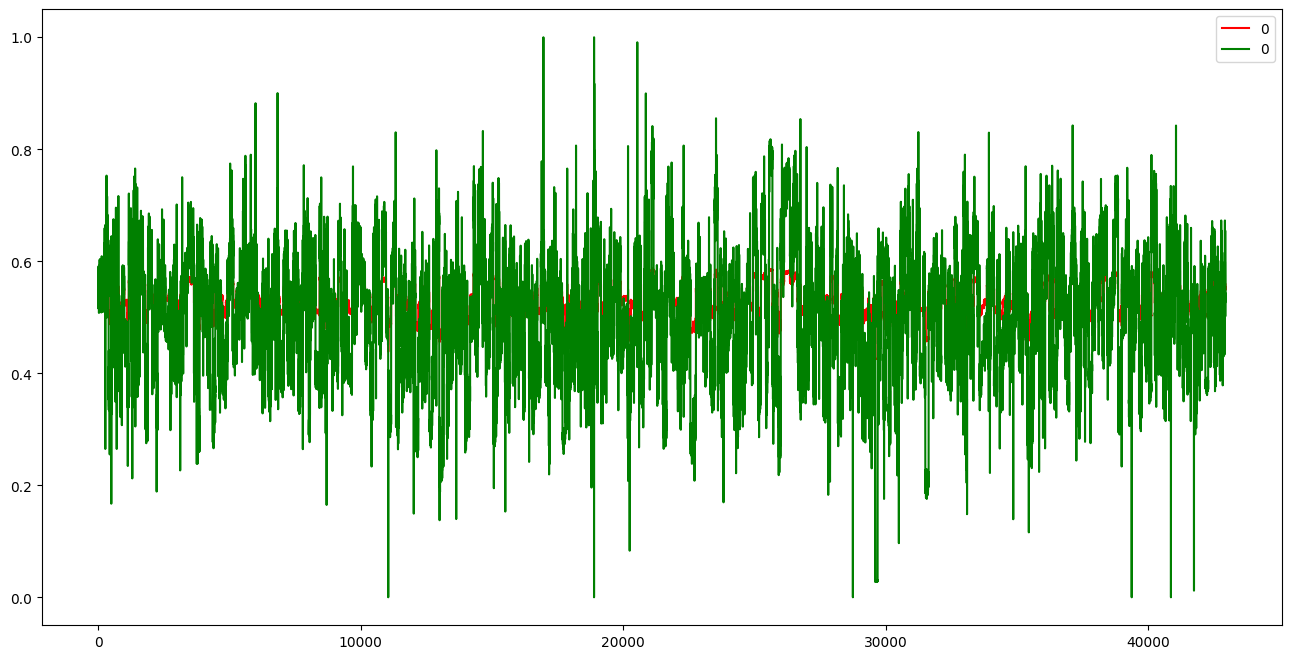

In [ ]:
# y_pred,sp500_Y_test = y_pred.reshape(-1,2),sp500_Y_test.reshape(-1,2)
y_pred,sp500_Y_test = pd.DataFrame(y_pred),pd.DataFrame(sp500_Y_test)
y_pred.plot(figsize=(16,8),color = 'red')
for i in range(0,y_pred.shape[1]): 
    oneday= pd.concat([y_pred[i],sp500_Y_test[i]],axis=1)
    oneday.plot(figsize=(16,8),color = ('red','green'))
    
    